# Tanzanian Water Wells

### Import Necessary Packages

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Import Data

In [4]:
df2 = pd.read_csv('data/training_set_labels.csv')
df3 = pd.read_csv('data/training_set_values.csv')

### EDA and Data Cleaning

#### Merge the training set data frames together 

In [5]:
training = pd.merge(df2, df3)

In [6]:
#Checking for missing data
#test.isna().sum().sort_values()
#training.isna().sum().sort_values()

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labelencoder = LabelEncoder()

In [8]:
# Assigning numerical values and storing in another column
training['status_group'] = labelencoder.fit_transform(training['status_group'])
training

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,0,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,2,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,0,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,0,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [9]:
# Dropping null values
training = training.dropna()

In [10]:
print('Training Data missing: ', training.isna().sum().sum())

print('Training Shape: ', training.shape)

Training Data missing:  0
Training Shape:  (27813, 41)


In [11]:
training.value_counts('status_group')

status_group
0    16056
2     9744
1     2013
dtype: int64

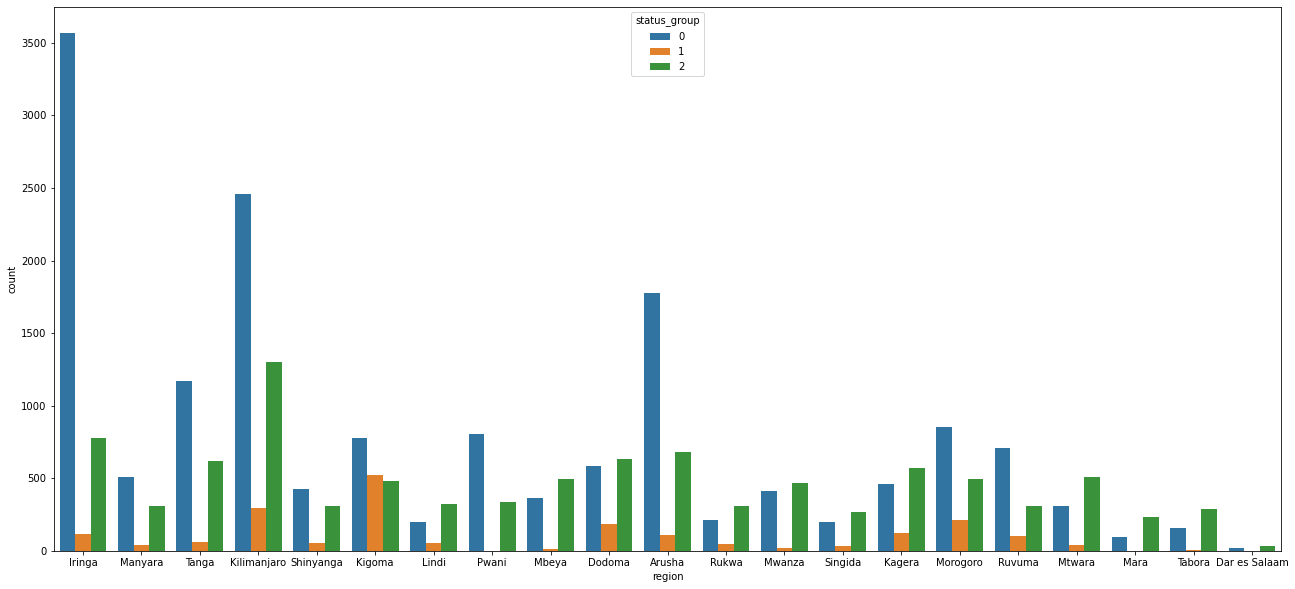

In [12]:
plt.figure(figsize=(22,10))
sns.countplot(data=training,x='region',hue='status_group');

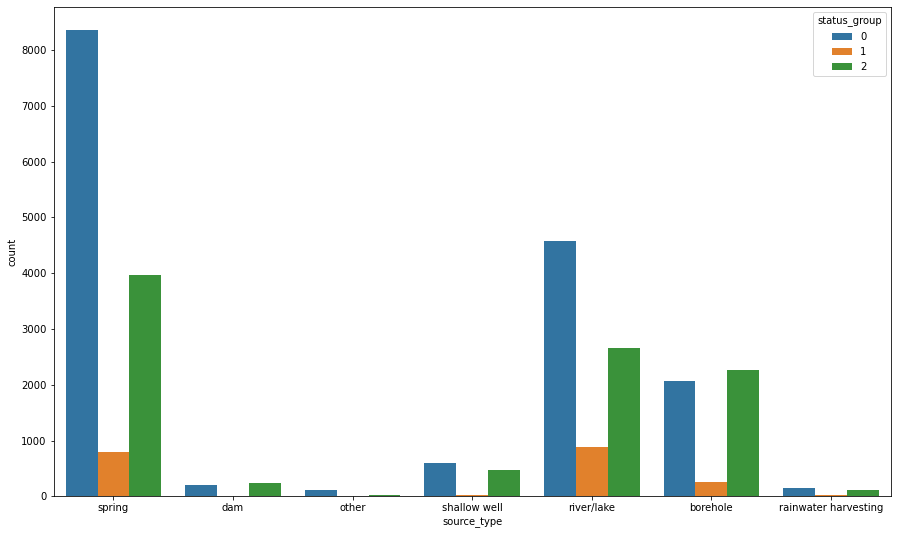

In [13]:
plt.figure(figsize=(15, 9))
sns.countplot(data=training,x='source_type',hue='status_group');

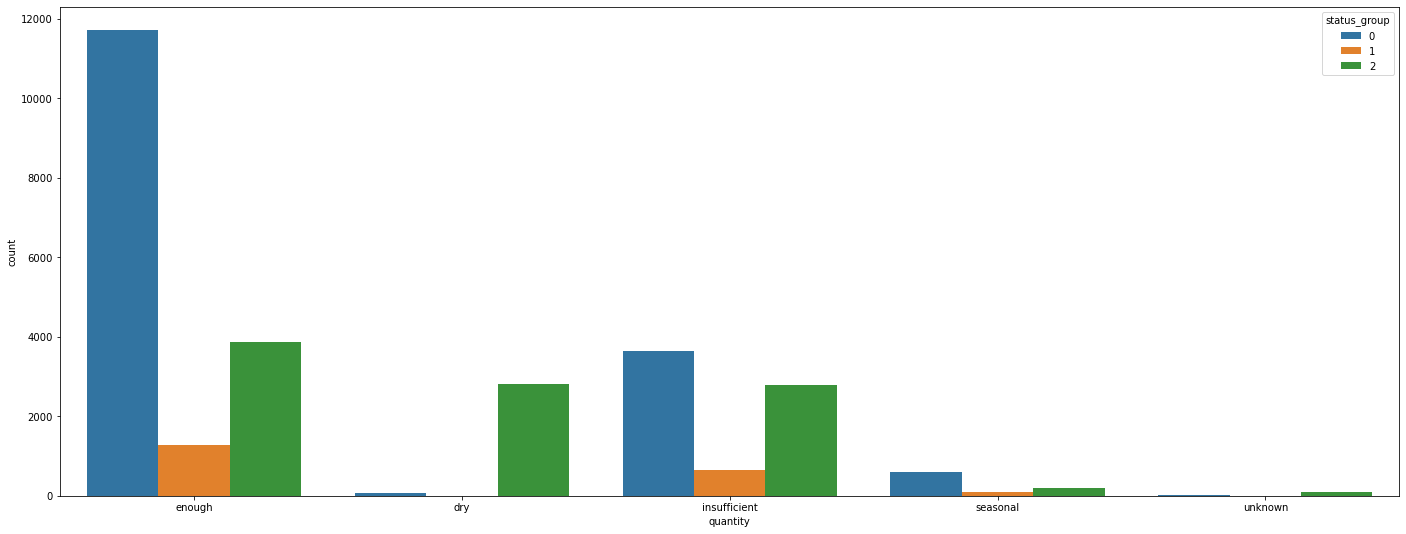

In [14]:
plt.figure(figsize=(24, 9))
sns.countplot(data=training,x='quantity',hue='status_group');

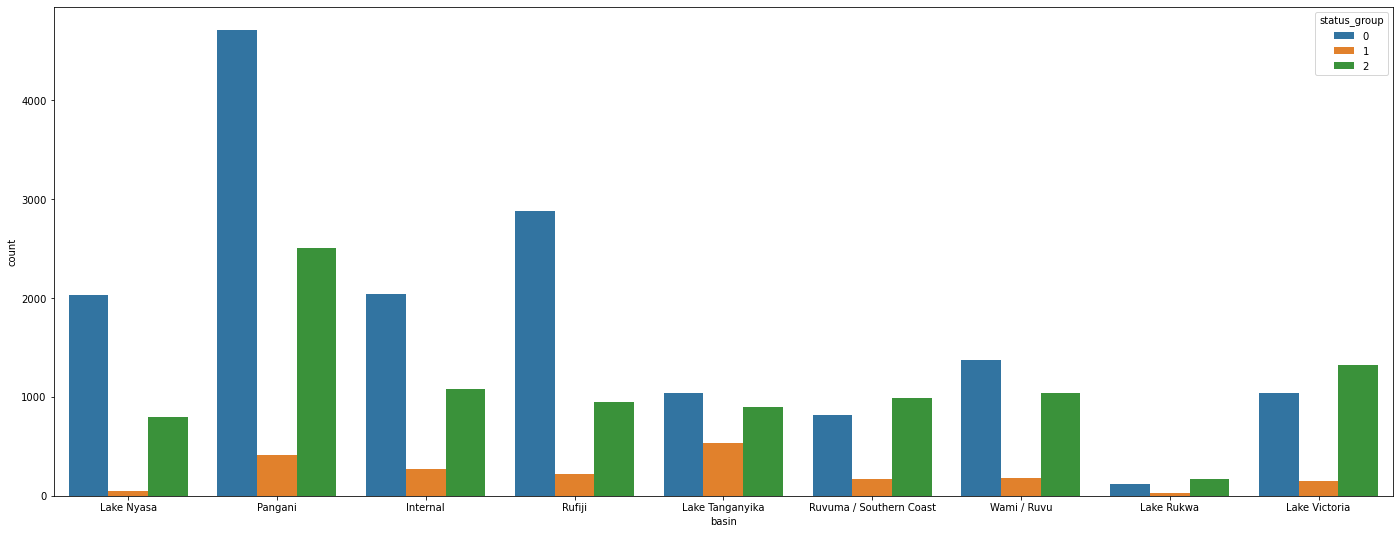

In [15]:
plt.figure(figsize=(24, 9))
sns.countplot(data=training,x='basin',hue='status_group');

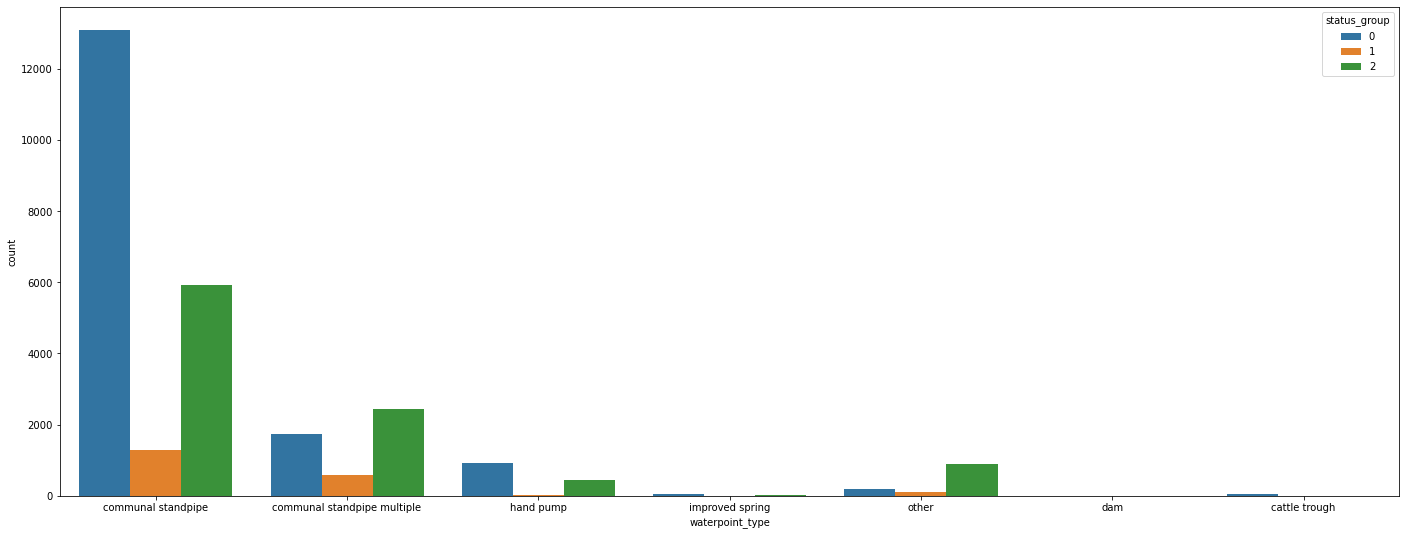

In [16]:
plt.figure(figsize=(24, 9))
sns.countplot(data=training,x='waterpoint_type',hue='status_group');

In [17]:
training.columns

Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

### DataFrame with the most important features

In [18]:
sorted_training = training[['id','status_group','amount_tsh','longitude', 'latitude', 'quantity',
                           'waterpoint_type','payment_type', 'management',
                            'water_quality','population','region', 'gps_height',
                            'scheme_management', 'source', 'lga', 'funder', 'district_code',
                           'basin', 'installer','extraction_type']]
sorted_training

,id,status_group,amount_tsh,longitude,latitude,quantity,waterpoint_type,payment_type,management,water_quality,...,region,gps_height,scheme_management,source,lga,funder,district_code,basin,installer,extraction_type
0,69572,0,6000.0,34.938093,-9.856322,enough,communal standpipe,annually,vwc,soft,...,Iringa,1390,VWC,spring,Ludewa,Roman,5,Lake Nyasa,Roman,gravity
2,34310,0,25.0,37.460664,-3.821329,enough,communal standpipe multiple,per bucket,vwc,soft,...,Manyara,686,VWC,dam,Simanjiro,Lottery Club,4,Pangani,World vision,gravity
5,9944,0,20.0,39.172796,-4.765587,enough,communal standpipe multiple,per bucket,vwc,salty,...,Tanga,0,VWC,other,Mkinga,Mkinga Distric Coun,8,Pangani,DWE,submersible
13,50495,0,0.0,37.092574,-3.181783,enough,communal standpipe,monthly,water board,soft,...,Kilimanjaro,1368,Water Board,spring,Siha,Lawatefuka Water Supply,7,Pangani,Lawatefuka water sup,gravity
14,53752,0,0.0,34.364073,-3.629333,enough,hand pump,never pay,wug,soft,...,Shinyanga,0,WUG,shallow well,Meatu,Biore,6,Internal,WEDECO,nira/tanira
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59381,67885,2,0.0,38.835001,-4.880204,insufficient,communal standpipe,never pay,vwc,soft,...,Tanga,0,VWC,spring,Mkinga,Mkinga Distric Coun,8,Pangani,DWE,gravity
59382,47002,2,6.0,37.454759,-3.323599,enough,communal standpipe,per bucket,water board,soft,...,Kilimanjaro,1383,Water Board,spring,Moshi Rural,Ces(gmbh),4,Pangani,DWE,gravity
59391,44885,2,0.0,38.044070,-4.272218,enough,communal standpipe,never pay,vwc,soft,...,Kilimanjaro,540,Water authority,river,Same,Government Of Tanzania,3,Pangani,Government,gravity
59395,60739,0,10.0,37.169807,-3.253847,enough,communal standpipe,per bucket,water board,soft,...,Kilimanjaro,1210,Water Board,spring,Hai,Germany Republi,5,Pangani,CES,gravity


#### Looking deeper at the values in the new dataframe

In [19]:
col_names = sorted_training.columns

In [20]:
sorted_training.extraction_type.value_counts()

gravity              19611
submersible           2842
mono                  1777
ksb                   1161
other                  844
nira/tanira            747
afridev                199
india mark ii          192
swn 80                 147
cemo                    89
windmill                70
other - play pump       66
climax                  29
other - rope pump       27
other - swn 81          10
india mark iii           2
Name: extraction_type, dtype: int64

In [21]:
sorted_training.quantity.value_counts()

enough          16862
insufficient     7067
dry              2875
seasonal          886
unknown           123
Name: quantity, dtype: int64

In [22]:
sorted_training.payment_type.value_counts()

never pay     10040
per bucket     6133
monthly        5894
annually       2266
unknown        2065
on failure     1210
other           205
Name: payment_type, dtype: int64

In [23]:
sorted_training.source.value_counts()

spring                  13121
river                    7576
machine dbh              4461
shallow well             1089
lake                      544
dam                       459
rainwater harvesting      291
other                     139
hand dtw                  117
unknown                    16
Name: source, dtype: int64

In [24]:
sorted_training.basin.value_counts()

Pangani                    7630
Rufiji                     4048
Internal                   3393
Lake Nyasa                 2868
Wami / Ruvu                2594
Lake Victoria              2513
Lake Tanganyika            2472
Ruvuma / Southern Coast    1973
Lake Rukwa                  322
Name: basin, dtype: int64

<AxesSubplot:xlabel='status_group'>

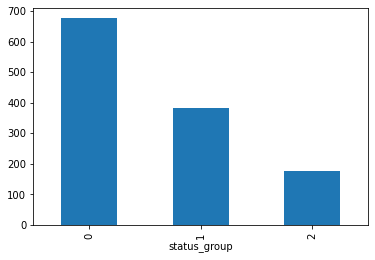

In [25]:
training.groupby('status_group').mean()['amount_tsh'].plot(kind='bar')

In [26]:
training.groupby('status_group').mean()['amount_tsh']

status_group
0    677.434230
1    381.551416
2    176.430973
Name: amount_tsh, dtype: float64

In [27]:
def bin_tsh(x):
    
    if x > 381.551416:
        return 0
    elif x > 176.430973:
        return 1
    else:
        return 2
    

from sklearn.metrics import confusion_matrix
training['amount_tsh'].apply(bin_tsh)

0        0
2        2
5        2
13       2
14       2
        ..
59381    2
59382    2
59391    2
59395    2
59396    0
Name: amount_tsh, Length: 27813, dtype: int64

In [28]:
#long and lat 


In [29]:
#sns.boxplot(x='status_group', y='amount_tsh', data=training, showfliers=False)

In [30]:
#sorted_training.value_counts('status_group')

In [31]:
#sorted_training.loc[sorted_training['construction_year']== 0]

## Baseline Model

In [32]:
small_df = training[['status_group','region','source_type','quantity',
                   'longitude','latitude']]

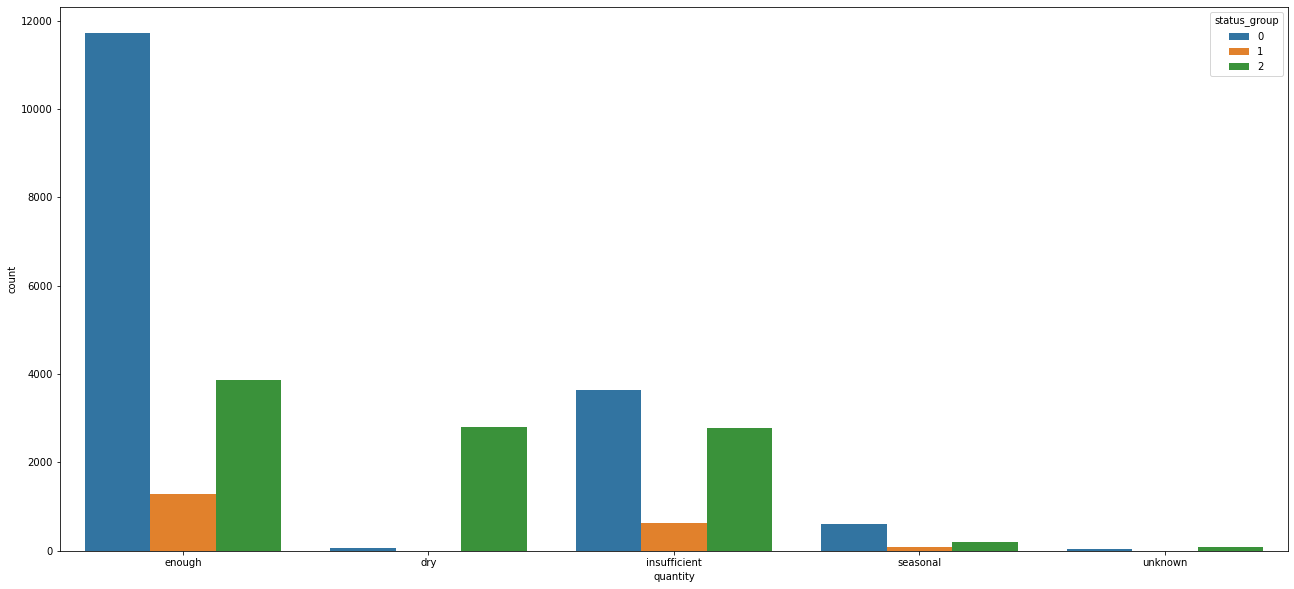

In [87]:
plt.figure(figsize=(22,10))
sns.countplot(data=small_df,x='quantity',hue='status_group');

In [33]:
# Target
y_simp = small_df['status_group']
# Features
X_simp = small_df.drop('status_group', axis=1)

In [34]:
num_cols_simp = list(X_simp.select_dtypes('number').columns)
num_cols_simp

['longitude', 'latitude']

In [35]:
cat_cols_simp = list(X_simp.select_dtypes('object').columns)
cat_cols_simp

['region', 'source_type', 'quantity']

In [36]:
X_train_simp, X_test_simp, y_train_simp, y_test_simp = train_test_split(X_simp, y_simp, test_size=.15, random_state=2021)

#### Scale the numeric columns

In [37]:
# Instantiate StandardScaler
scaler_simp = StandardScaler()
# fit on Imputed training data
scaler_simp.fit(X_train_simp[num_cols_simp])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
# transform training and validation data
X_train_scaled_simp = pd.DataFrame(scaler_simp.transform(X_train_simp[num_cols_simp]), columns=num_cols_simp)

#### One Hot Encode the categorical columns

In [39]:
ohe_simp = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [40]:
# fit on categorical data
ohe_simp.fit(X_train_simp[cat_cols_simp])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=False)

In [41]:
X_train_encoded_simp = ohe_simp.transform(X_train_simp[cat_cols_simp])

In [42]:
X_train_encoded_df_simp = pd.DataFrame(X_train_encoded_simp, columns=ohe_simp.get_feature_names())

#### Merge the categorical and numerical data

In [43]:
X_train_df_simp = pd.concat([X_train_scaled_simp, X_train_encoded_df_simp], axis=1)

In [44]:
logreg1_simp = LogisticRegression(solver='liblinear')

#### Define a function for the model

In [45]:
def modeling_function_simp(model, X_train, y_train):

    # fit model on training data
    model.fit(X_train, y_train)

    # make predictions on training and validation data
    train_preds = model.predict(X_train)

    # Print accuracy score
    print('Training accuracy: ', accuracy_score(y_train, train_preds))

    # return fitted model
    return model

#### Run the baseline model 

In [46]:
model_simp = modeling_function_simp(logreg1_simp, X_train_df_simp, y_train_simp)

Training accuracy:  0.6887610507169748


## Predictive Modeling 

#### Define the target variable

In [47]:
# Target
y = sorted_training['status_group']
# Features
X = sorted_training.drop('status_group', axis=1)

#### Split the training and testing data

In [48]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=.15, random_state=2021, stratify=y)

In [49]:
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=.15, random_state=2021, stratify=y_tr)

#### Define the Categorical and Numberic Columns

In [50]:
cat_cols = list(X.select_dtypes('object').columns)

In [51]:
num_cols = list(X.select_dtypes('number').columns)

#### Scale Numeric Data

In [52]:
# Instantiate StandardScaler
scaler = StandardScaler()
# fit on Imputed training data
scaler.fit(X_train[num_cols])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [53]:
# transform training and validation data
X_train_scaled = pd.DataFrame(scaler.transform(X_train[num_cols]), columns=num_cols)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[num_cols]), columns=num_cols)

In [54]:
#X_train_scaled

#### Encode Categorical Data

In [55]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [56]:
# fit on categorical data
ohe.fit(X_train[cat_cols])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=False)

In [57]:
#P(functional|installer) = P(installer|functional) * P(functional)/P(installer)
#P(A and B) = P(A) * P(B|A)

# P(installer|functional) = P(installer and functional)/P(installer)

In [58]:
X_train[cat_cols]

,quantity,waterpoint_type,payment_type,management,water_quality,region,scheme_management,source,lga,funder,basin,installer,extraction_type
40742,enough,communal standpipe multiple,per bucket,vwc,soft,Mara,VWC,dam,Tarime,Ministry Of Water,Lake Victoria,Wizara ya maji,ksb
40357,insufficient,communal standpipe,monthly,company,soft,Kilimanjaro,Company,spring,Rombo,Government Of Tanzania,Pangani,District council,gravity
7142,seasonal,communal standpipe,never pay,vwc,soft,Mtwara,Water Board,machine dbh,Tandahimba,Finw,Ruvuma / Southern Coast,FinW,submersible
42252,enough,communal standpipe multiple,never pay,vwc,soft,Arusha,VWC,spring,Arusha Rural,Padep,Internal,DWE,gravity
52308,enough,communal standpipe,never pay,vwc,soft,Mara,VWC,lake,Rorya,Ministry Of Water,Lake Victoria,Hesawa,submersible
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43655,insufficient,communal standpipe,never pay,vwc,soft,Kilimanjaro,VWC,spring,Moshi Rural,Government Of Tanzania,Pangani,DWE,gravity
9955,enough,communal standpipe,monthly,vwc,soft,Iringa,VWC,spring,Ludewa,Roman,Lake Nyasa,wanan,gravity
22193,enough,communal standpipe,never pay,vwc,soft,Arusha,VWC,spring,Arusha Rural,Olgilai Village Community,Pangani,Olgilai village community,gravity
39728,insufficient,other,monthly,water board,soft,Kilimanjaro,Water Board,river,Mwanga,Government Of Tanzania,Pangani,Central govt,gravity


In [59]:
# transform training and validation data
X_train_encoded = ohe.transform(X_train[cat_cols])
X_val_encoded = ohe.transform(X_val[cat_cols])

In [60]:
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=ohe.get_feature_names())
X_val_encoded_df = pd.DataFrame(X_val_encoded, columns=ohe.get_feature_names())

In [61]:
X_train_encoded_df

,x0_dry,x0_enough,x0_insufficient,x0_seasonal,x0_unknown,x1_cattle trough,x1_communal standpipe,x1_communal standpipe multiple,x1_dam,x1_hand pump,...,x12_ksb,x12_mono,x12_nira/tanira,x12_other,x12_other - play pump,x12_other - rope pump,x12_other - swn 81,x12_submersible,x12_swn 80,x12_windmill
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20089,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20090,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20091,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20092,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Combine Scaled and Encoded Data

In [62]:
X_train_df = pd.concat([X_train_scaled, X_train_encoded_df], axis=1)
X_val_df = pd.concat([X_val_scaled, X_val_encoded_df], axis=1)

In [63]:
X_train_df.shape

(20094, 1787)

In [64]:
X_val_df.shape

(3547, 1787)

### Model 1

In [65]:
logreg1 = LogisticRegression(solver='liblinear')

In [66]:
def modeling_function(model, X_train, y_train, X_val, y_val):

    # fit model on training data
    model.fit(X_train, y_train)

    # make predictions on training and validation data
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    # Print accuracy score
    print('Training accuracy: ', accuracy_score(y_train, train_preds))
    print('Validation accuracy: ', accuracy_score(y_val, val_preds))

    # return fitted model
    return model

In [67]:
model_1 = modeling_function(logreg1, X_train_df, y_train, X_val_df, y_val)

Training accuracy:  0.8033741415347865
Validation accuracy:  0.7851705666760643


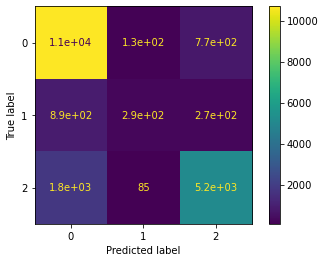

In [68]:
plot_confusion_matrix(logreg1, X_train_df, y_train)

In [67]:
y.value_counts()

0    16056
2     9744
1     2013
Name: status_group, dtype: int64

In [68]:
#!pip install imbalanced-learn==0.6.0
#!pip install scikit-learn==0.22.1

In [69]:
#pip install imblearn

In [70]:
from imblearn.over_sampling import SMOTE

In [71]:
sm = SMOTE(random_state=2021)

In [72]:
X_train_res, y_train_res = sm.fit_resample(X_train_df, y_train)

In [73]:
y_train_res.value_counts()

2    11573
1    11573
0    11573
Name: status_group, dtype: int64

### Model 2
Use the smote data to see if fixing the class imbalance will improve the model... it didnt 

In [74]:
logreg2 = LogisticRegression(solver='liblinear')

In [75]:
logreg2.fit(X_train_res, y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
logreg2 = modeling_function(logreg2, X_train_res, y_train_res, X_val_df, y_val)

Training accuracy:  0.7548028457040813
Validation accuracy:  0.7028474767409079


### Model 3

In [77]:
def modeling_score(model, X_train, y_train, X_val, y_val):

    # fit model on training data
    model.fit(X_train, y_train)

    # make predictions on training and validation data
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    return accuracy_score(y_train, train_preds), accuracy_score(y_val, val_preds)

cs = np.arange(.01, 1, .01)

train_scores = []
val_scores = []

for c in cs:
    logreg3 = LogisticRegression(solver='liblinear', penalty='l1', C=c)
    train_, val_ = modeling_score(logreg3, X_train_res, y_train_res, X_val_df, y_val)
    train_scores.append(train_)
    val_scores.append(val_)

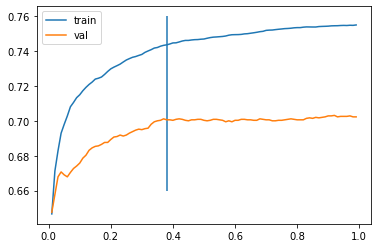

In [78]:
plt.plot(cs, train_scores, label='train')
plt.plot(cs, val_scores, label='val')
plt.vlines(0.38, .66, .76)
plt.legend()

In [79]:
#sorted(list(zip(cs, val_scores)), key=lambda x: x[1], reverse=True)

In [80]:
logreg3 = modeling_function(logreg3, X_train_res, y_train_res, X_val_df, y_val)

Training accuracy:  0.7550044644142977
Validation accuracy:  0.70228361996053


In [81]:
logreg3 = modeling_score(logreg3, X_train_res, y_train_res, X_val_df, y_val)

### Model 4

In [82]:
rf = RandomForestClassifier(random_state=2021)

In [83]:
rf = modeling_function(rf, X_train_df, y_train, X_val_df, y_val)

Training accuracy:  1.0
Validation accuracy:  0.8280236819847758


In [84]:
param_grid = {'n_estimators': [50, 75, 100],
                'max_depth': [5, 10, 15],
                'min_samples_leaf': [6, 8, 10],
              'criterion': ['gini', 'entropy'],
                 'n_jobs': [-1]}

In [85]:
rf_gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy')

In [86]:
rf_gs.fit(X_train_df, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [87]:
rf_gs1 = rf_gs.best_estimator_
rf_gs1

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2021, verbose=0,
                       warm_start=False)

In [88]:
rf_gs.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 6,
 'n_estimators': 100,
 'n_jobs': -1}

In [89]:
modeling_function(rf_gs1, X_train_df, y_train, X_val_df, y_val)

Training accuracy:  0.767243953418931
Validation accuracy:  0.7612066535100085


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2021, verbose=0,
                       warm_start=False)

### Model 5

In [90]:
param_grid2 = {'n_estimators': [80,100,120],
                'max_depth': [13,15,17,20],
                'min_samples_leaf': [2,4,6],
                 'n_jobs': [-1]}

In [91]:
rf2 = RandomForestClassifier(criterion='gini', bootstrap=False, random_state=2021)

In [92]:
rf_gs2=GridSearchCV(estimator=rf2, param_grid=param_grid2, scoring='accuracy')

In [93]:
rf_gs2.fit(X_train_res, y_train_res)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              r

In [94]:
best_model = rf_gs2.best_estimator_

In [95]:
rf_gs2.best_params_

{'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 120, 'n_jobs': -1}

In [96]:
modeling_function(best_model, X_train_res, y_train_res, X_val_df, y_val)

Training accuracy:  0.8630144877444627
Validation accuracy:  0.7626162954609529


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=-1, oob_score=False, random_state=2021, verbose=0,
                       warm_start=False)

In [97]:
top_feats = best_model.feature_importances_
top_feats

array([0.01159317, 0.03576525, 0.04880261, ..., 0.00374084, 0.00023505,
       0.00013706])

In [ ]:
for fi, feature in zip(col_names, best_model.feature_importances_):
    print(fi, feature)

In [103]:
#from sklearn.inspection import permutation_importance
#results = permutation_importance(best_model, X_train_res, y_train_res)

In [ ]:
#rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)

In [ ]:
#rfe.fit(X_train_res, y_train_res)

In [ ]:
# estimator = SVR(kernel="linear")
# selector = RFECV(estimator, step=1, cv=5)
# selector = selector.fit(X_train_res, y_train_res)
# selector.support_

In [ ]:
#rf3 = modeling_function(rf_gs3, X_train_res, y_train_res, X_val_df, y_val)b

## Testing Data on Model 1 
Following the same steps as above, run the model on the testing data.

In [131]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test[num_cols]), columns=num_cols)
X_test_encoded = pd.DataFrame(ohe.transform(X_test[cat_cols]), columns=ohe.get_feature_names())

In [132]:
X_test_df = pd.concat([X_test_scaled, X_test_encoded], axis=1)

In [134]:
test_preds = logreg1.predict(X_test_df)

In [140]:
accuracy_score(y_test, test_preds)

0.7847555129434324

In [80]:
importance = logreg1.coef_[0]

### Visulals

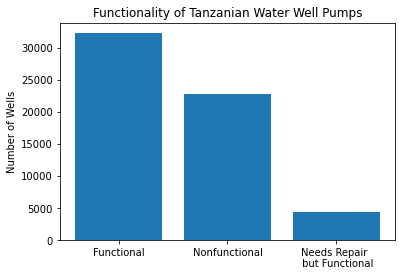

In [88]:
plt.bar(df2['status_group'].unique(), df2['status_group'].value_counts(), 
        tick_label = ['Functional', 'Nonfunctional', 'Needs Repair \n but Functional'])
plt.title('Functionality of Tanzanian Water Well Pumps')
plt.ylabel('Number of Wells')
plt.savefig('functionality_barchart.png', dpi = 300, transparent = True);